In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the lognormal function based on the provided R code
def lognormal_nls(x, mu, sigma, K):
    return K / (np.sqrt(2 * np.pi) * np.log(sigma)) * np.exp(- (np.log(x) - np.log(mu))**2 / (2 * np.log(sigma)**2))



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def read_data(file_name, mode='up'):
    # Skip the initial configuration lines
    
    data = pd.read_csv(file_name, skiprows=56, delimiter='\t')
    num_rows = data.shape[0]


    if 'SCAN' in file_name:
        if mode == 'up':
            data = data.where(data['scan_direction'] == 0).dropna(axis=0, how='all')
        elif mode == 'down':
            data = data.where(data['scan_direction'] == 1).dropna(axis=0, how='all')
        else:
            print('using all data')


    else:
        if mode == 'up':
            data = data.iloc[::2]
        
        elif mode == 'down':
            data = data.iloc[1::2]

    bin_dia_cols = [col for col in data.columns if 'bin_dia' in col]
    bin_conc_cols = [col for col in data.columns if 'bin_conc' in col]
    
    if len(bin_dia_cols) == 0:
        bin_dia_cols = [col for col in data.columns if 'Dia' in col]
        bin_conc_cols = [col for col in data.columns if 'Conc' in col]



    
    dia = data[bin_dia_cols]
    conc = data[bin_conc_cols]


    try: 
        time = data['#YY/MM/DD']+'T'+data['HR:MN:SC']
        time = pd.to_datetime(time, format='%y/%m/%dT%H:%M:%S')

    except KeyError:
        time = data['#Date']+'T'+data['Time']        
        time = pd.to_datetime(time, format='%y/%m/%dT%H:%M:%S')



    return dia, conc, time


#file_name = "/home/josh/OneDrive/TROPOS/mSMES/Data - Copy/mSEMS_107_230807_100619_SCAN.txt"
#data = read_data(file_name)

dir = "/home/josh/OneDrive/TROPOS/mSMES/21-08-23/"
filenames = [os.path.join(dir, file) for file in os.scandir(dir) if 'SCAN' in file.name]
filenames.sort()

filenames_igor = [os.path.join(dir, file) for file in os.scandir(dir) if 'INVERTED' in file.name]


igor_file = '/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_120000_INVERTED.txt'
uav_file = '/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_120000_SCAN.txt'


for file in filenames:
    bin, conc, time = read_data(file)

    print(file)
    #print(bin)



/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_100503_SCAN.txt
/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_103606_SCAN.txt
/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_120000_SCAN.txt
/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_141443_SCAN.txt
/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_142341_SCAN.txt
/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_145018_SCAN.txt
/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_150946_SCAN.txt
/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_152232_SCAN.txt


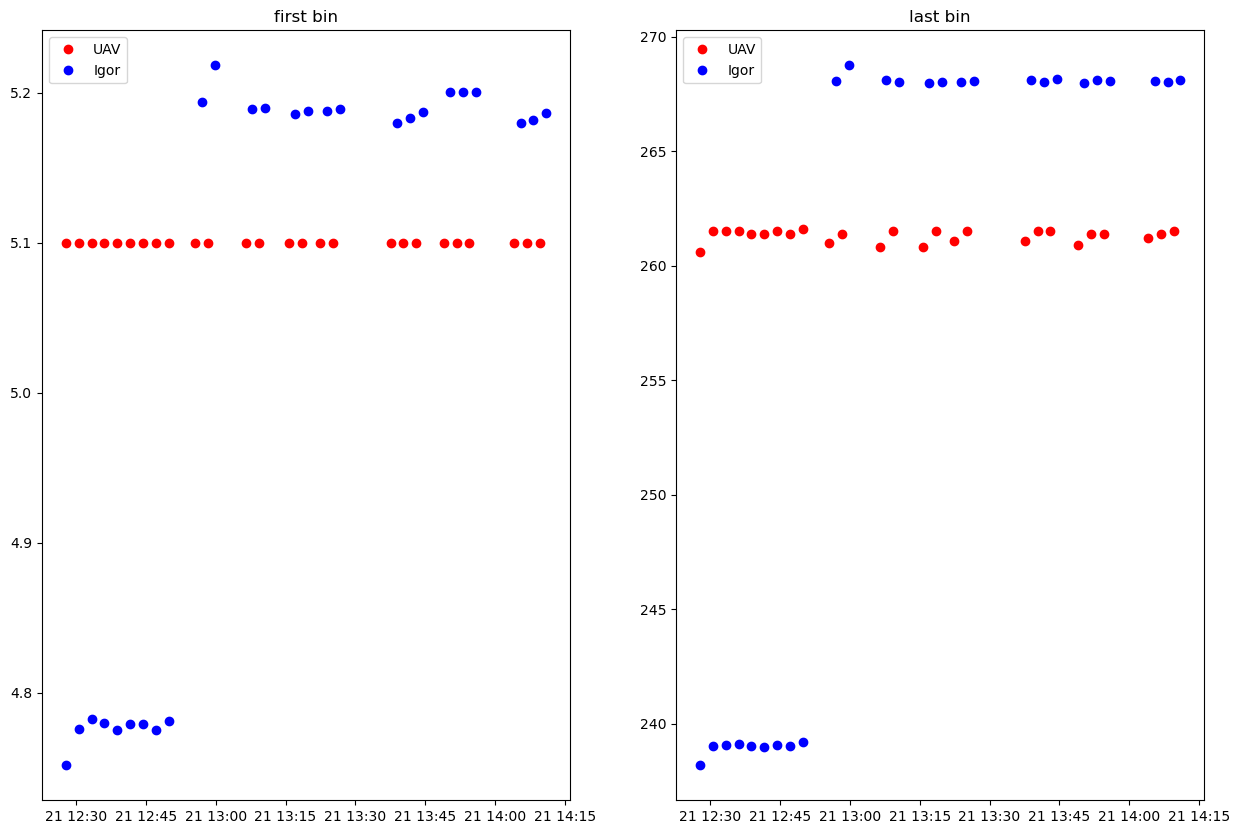

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))


bin, conc, time = read_data(uav_file)
ax[0].plot(time, bin.iloc[:,0], 'ro',label='UAV')
ax[1].plot(time, bin.iloc[:,-1], 'ro',label='UAV')


bin, conc, time = read_data(igor_file, )
ax[0].plot(time, bin.iloc[:,0], 'bo', label='Igor')
ax[1].plot(time, bin.iloc[:,-1], 'bo',label='Igor')
ax[0].set_title('first bin')

ax[1].set_title('last bin')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')


[5.165516 5.189979 5.191888 5.186459 5.189587 5.189348 5.187044 5.188211
 4.779057 4.781846 4.775783 4.77836  4.774683 4.776729 4.776331 4.77687
 4.765068 4.771477 4.774374 4.793552 4.787498 4.787627 4.765772 4.770415
 4.774446]


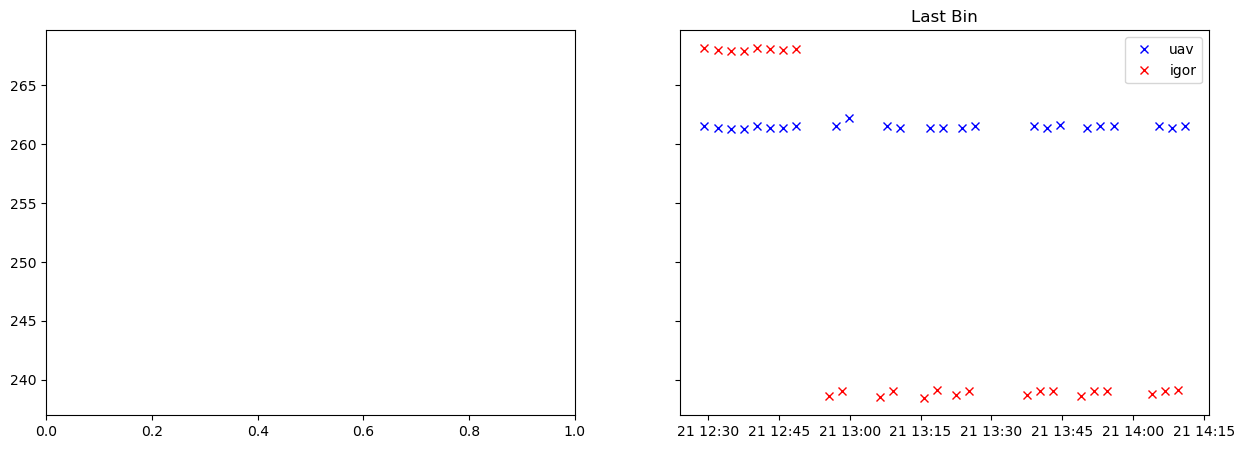

In [6]:
import xarray as xr

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

bin, conc, time = read_data(uav_file, mode='down')
bin = np.array(bin, dtype=np.float32)
conc = np.array(conc, dtype=np.float32)
xr_data_uav = xr.DataArray(conc, dims=['time', 'bin'], coords={'time': time, 'bin': bin.mean(axis=0)})
plt.plot(time, bin[:,-1], 'bx', label='uav')
bin, conc, time = read_data(igor_file, mode='down')

bin = np.array(bin, dtype=np.float32)
print(bin[:,0])
plt.plot(time, bin[:,-1], 'rx', label='igor')
plt.title('Last Bin')
plt.legend()

conc = np.array(conc, dtype=np.float32)
xr_data_igor = xr.DataArray(conc, dims=['time', 'bin'], coords={'time': time, 'bin': bin.mean(axis=0)})
#plt.imshow(bin)
xr_data_igor.name = 'IGOR'
xr_data_uav.name = 'UAV'


#composite_ds = xr.Dataset({'IGOR': xr_data_igor, 'UAV': xr_data_uav})


In [7]:
#ds =list_of_xarrays[3].isel(time=[24, 27, 30, 38, 40, -5])

times = [24, 27, 30, 38, 40, -5]
times = [12, 14, 15, 19, 21, -1]

ds = composite_ds.isel(time=times)['IGOR']

#ds =list_of_xarrays[0].isel(time=[24, 27, 30, 38, 40, -5])

peaks = ds.argmax(dim='bin')

data = ds

mask_dists = np.logspace(1.5, 2, 6)

names = ['80nm PSL', '100nm PSL', '125nm PSL', '150nm PSL', '200nm PSL', '245nm PSL']
centers = [80, 100, 125, 150, 200, 245]

fig, axs = plt.subplots(6, 1, figsize=(10, 6), sharex=True)

for i, ax in enumerate(axs):
    ds.isel(time=i).plot(ax=ax, marker='o', ls='--', lw=0.5, color='k', ms=2, xscale='log', label=names[i])
    x = ds.isel(time=i).bin[peaks.isel(time=i)]
    y = ds.isel(time=i)[peaks.isel(time=i)]
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xlim(10, 500)
    name = names[i]    

    measurement_data = data.sel(time=data['time'].values[i]).values
    
    # Extract the relevant range from the data (20th to 200th value)
    x_data = ds.isel(time=i).bin.values
    y_data = ds.isel(time=i)
    mask_range = ((x.values - mask_dists[i]) < x_data) & (x_data < (x.values + mask_dists[i]))

    y_data = y_data.where(mask_range, 0)
  
    # Initial guesses based on the previous fitting process
    mu_init = centers[i] if i < len(centers) else centers[-1]  # Use the last center for the remaining timesteps
    sigma_init = 1.2
    K_init = max(measurement_data)
    # Use curve_fit to optimize the parameters
    params_opt, _ = curve_fit(lognormal_nls, x_data, y_data, p0=[mu_init, sigma_init, K_init], maxfev=10000)
    mu, sigma, K = params_opt
    # Generate the fitted data using the optimized parameters
    y_fitted = lognormal_nls(x_data, *params_opt)
    # Plot the fitted distribution and data points
    ax.plot(x_data, y_fitted, 'r--', lw=1, label=f"Fitted Lognormal $\mu$={mu:.0f}nm; $\sigma$={sigma:.1f}",)
    #print(name)
    ax.legend(loc='upper left', fontsize=8)
    ax.plot([x, x], [y, 0], marker='o', ls='--', lw=0.5, color='r', ms=2)
    

ax.set_xlabel('Diameter (nm)', fontsize=12)
axs[2].set_ylabel(r'$dN/d\logD_p$', fontsize=12)
#plt.savefig('/home/josh/OneDrive/TROPOS/mSMES/msems_calibration.png', dpi=300, bbox_inches='tight')

NameError: name 'composite_ds' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def plot_dataset(ds, axs=None, color=('k', 'r')):
    peaks = ds.argmax(dim='bin')
    data = ds
    data_color, fit_color = color
    print(ds.name)

    mask_dists = np.logspace(1.5, 1.9, 6)
    names = ['80nm PSL', '100nm PSL', '125nm PSL', '150nm PSL', '200nm PSL', '245nm PSL']
    centers = [80, 100, 125, 150, 200, 245]

    if axs is None:
        fig, axs = plt.subplots(6, 1, figsize=(10, 6), sharex=True)

    for i, ax in enumerate(axs):
        ds.isel(time=i).plot(ax=ax, marker='o', ls='--', lw=0.5, color=data_color, ms=2, xscale='log', label=f'{names[i]} ({ds.name})')
        x = ds.isel(time=i).bin[peaks.isel(time=i)]
        y = ds.isel(time=i)[peaks.isel(time=i)]
        ax.set_title('')
        ax.set_xlabel('')
        ax.set_xlim(10, 500)
        name = names[i]    

        measurement_data = data.sel(time=data['time'].values[i]).values
        
        # Extract the relevant range from the data (20th to 200th value)
        x_data = ds.isel(time=i).bin.values
        y_data = ds.isel(time=i)
        mask_range = ((x.values - mask_dists[i]) < x_data) & (x_data < (x.values + mask_dists[i]))

        y_data = y_data.where(mask_range, 0)
      
        # Initial guesses based on the previous fitting process
        mu_init = centers[i] if i < len(centers) else centers[-1]  # Use the last center for the remaining timesteps
        sigma_init = 1.2
        K_init = max(measurement_data)
        # Use curve_fit to optimize the parameters
        params_opt, _ = curve_fit(lognormal_nls, x_data, y_data, p0=[mu_init, sigma_init, K_init], maxfev=10000)
        mu, sigma, K = params_opt
        # Generate the fitted data using the optimized parameters
        y_fitted = lognormal_nls(x_data, *params_opt)
        # Plot the fitted distribution and data points
        ax.plot(x_data, y_fitted, color=fit_color, linestyle='--', lw=1, label=f"Fitted Lognormal {ds.name} $\mu$={mu:.0f}nm; $\sigma$={sigma:.1f}",)
        ax.legend(loc='upper left', fontsize=8)
        ax.plot([x, x], [y, 0], marker='o', ls='--', lw=0.5, color=fit_color, ms=2)
        ax.set_ylabel('')
        

    ax.set_xlabel('Diameter (nm)', fontsize=12)
    axs[2].set_ylabel(r'$dN/d\logD_p$', fontsize=12)

# This function is now ready to be used with an xarray dataset as its argument.

#fig, axs = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

#plot_dataset(composite_ds.isel(time=[24, 27, 30, 38, 40, -5])['IGOR'], axs=axs, color=('blue', 'darkorange'))
#plot_dataset(composite_ds.isel(time=[24, 27, 30, 38, 40, -5])['UAV'], axs=axs)

IGOR


/tmp/ipykernel_7197/2940585629.py:9: RuntimeWarning: invalid value encountered in log
  return K / (np.sqrt(2 * np.pi) * np.log(sigma)) * np.exp(- (np.log(x) - np.log(mu))**2 / (2 * np.log(sigma)**2))


UAV


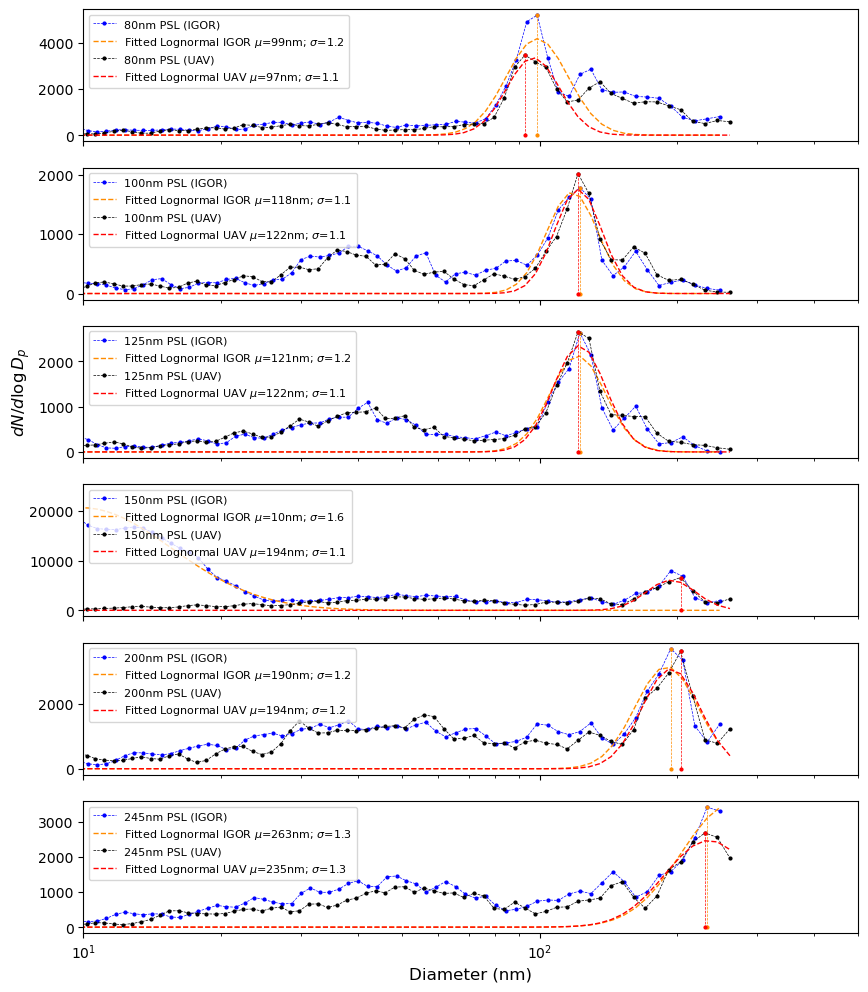

In [9]:
times = [12, 14, 15, 19, 21, -1]

fig, axs = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

plot_dataset(xr_data_igor.isel(time=times), axs=axs, color=('blue', 'darkorange'))
plot_dataset(xr_data_uav.isel(time=times), axs=axs)


IndexError: index 27 is out of bounds for axis 0 with size 26

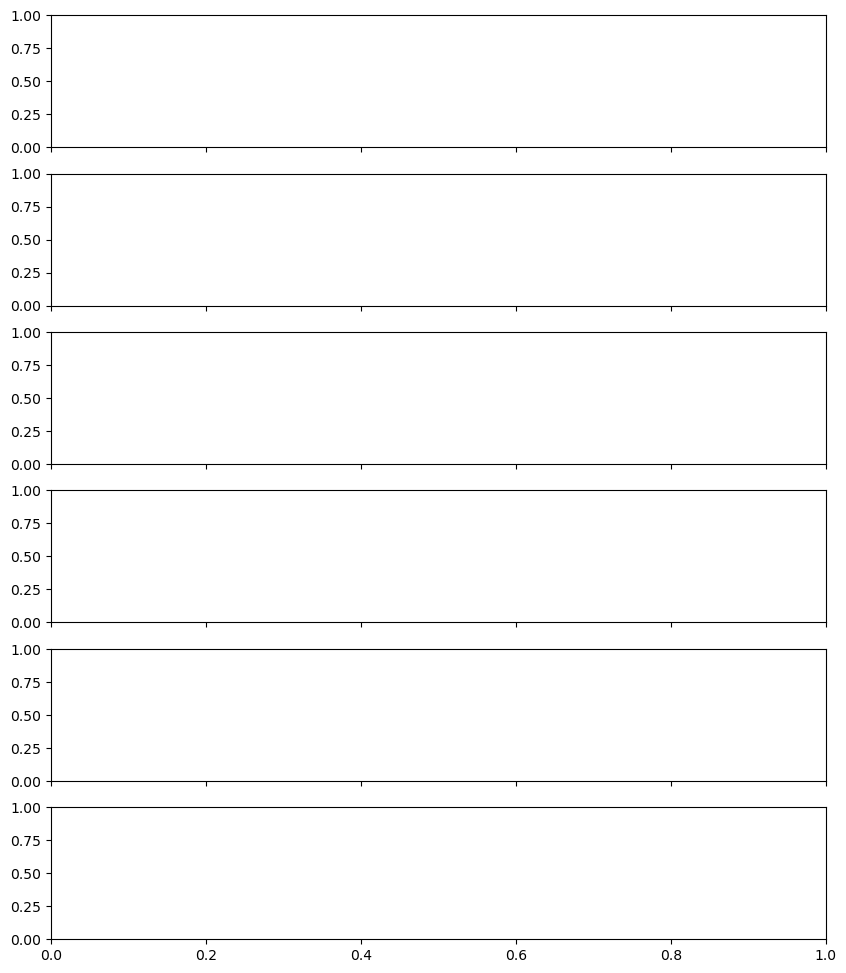

In [150]:
fig, axs = plt.subplots(6, 1, figsize=(10, 12), sharex=True)

plot_dataset(xr_data_igor.isel(time=[24, 27, 30, 38, 40, -5]), axs=axs, color=('blue', 'darkorange'))
plot_dataset(xr_data_uav.isel(time=[24, 27, 30, 38, 40, -5]), axs=axs)

In [ ]:
ds =list_of_xarrays[3].isel(time=[24, 27, 30, 38, 40, -5])

peaks = ds.argmax(dim='bin')

data = ds

mask_dists = np.logspace(1.5, 2, 6)

names = ['80nm PSL', '100nm PSL', '125nm PSL', '150nm PSL', '200nm PSL', '245nm PSL']
centers = [80, 100, 125, 150, 200, 245]

fig, axs = plt.subplots(6, 1, figsize=(10, 6), sharex=True)

for i, ax in enumerate(axs):
    ds.isel(time=i).plot(ax=ax, marker='o', ls='--', lw=0.5, color='k', ms=2, xscale='log', label=names[i])
    x = ds.isel(time=i).bin[peaks.isel(time=i)]
    y = ds.isel(time=i)[peaks.isel(time=i)]
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_xlim(10, 500)
    name = names[i]    

    measurement_data = data.sel(time=data['time'].values[i]).values
    
    # Extract the relevant range from the data (20th to 200th value)
    x_data = ds.isel(time=i).bin.values
    y_data = ds.isel(time=i)

    mask_range = ((x.values - mask_dists[i]) < x_data) & (x_data < (x.values + mask_dists[i]))

    y_data = y_data.where(mask_range, 0)

    #print(x_data[mask_range])

    #if i == 0:
    #    y_data = y_data.where(y_data.bin < 100, 0)
    #if i > 3:
    #    y_data = y_data.where(y_data.bin > 120, 0)
    #if i > 4:
    #    y_data = y_data.where(y_data.bin > 160, 0)
    #print(y_data.values)

    
    # Initial guesses based on the previous fitting process
    mu_init = centers[i] if i < len(centers) else centers[-1]  # Use the last center for the remaining timesteps
    sigma_init = 1.2
    K_init = max(measurement_data)
    
    # Use curve_fit to optimize the parameters
    params_opt, _ = curve_fit(lognormal_nls, x_data, y_data, p0=[mu_init, sigma_init, K_init], maxfev=10000)

    mu, sigma, K = params_opt
    
    # Generate the fitted data using the optimized parameters
    y_fitted = lognormal_nls(x_data, *params_opt)
    
    # Plot the fitted distribution and data points
    ax.plot(x_data, y_fitted, 'r--', lw=1, label=f"Fitted Lognormal $\mu$={mu:.0f}nm; $\sigma$={sigma:.1f}",)

    #print(name)
    ax.legend(loc='upper left', fontsize=8)

    ax.plot([x, x], [y, 0], marker='o', ls='--', lw=0.5, color='r', ms=2)
    

ax.set_xlabel('Diameter (nm)', fontsize=12)
axs[2].set_ylabel(r'$dN/d\logD_p$', fontsize=12)
#plt.savefig('/home/josh/OneDrive/TROPOS/mSMES/msems_calibration.png', dpi=300, bbox_inches='tight')

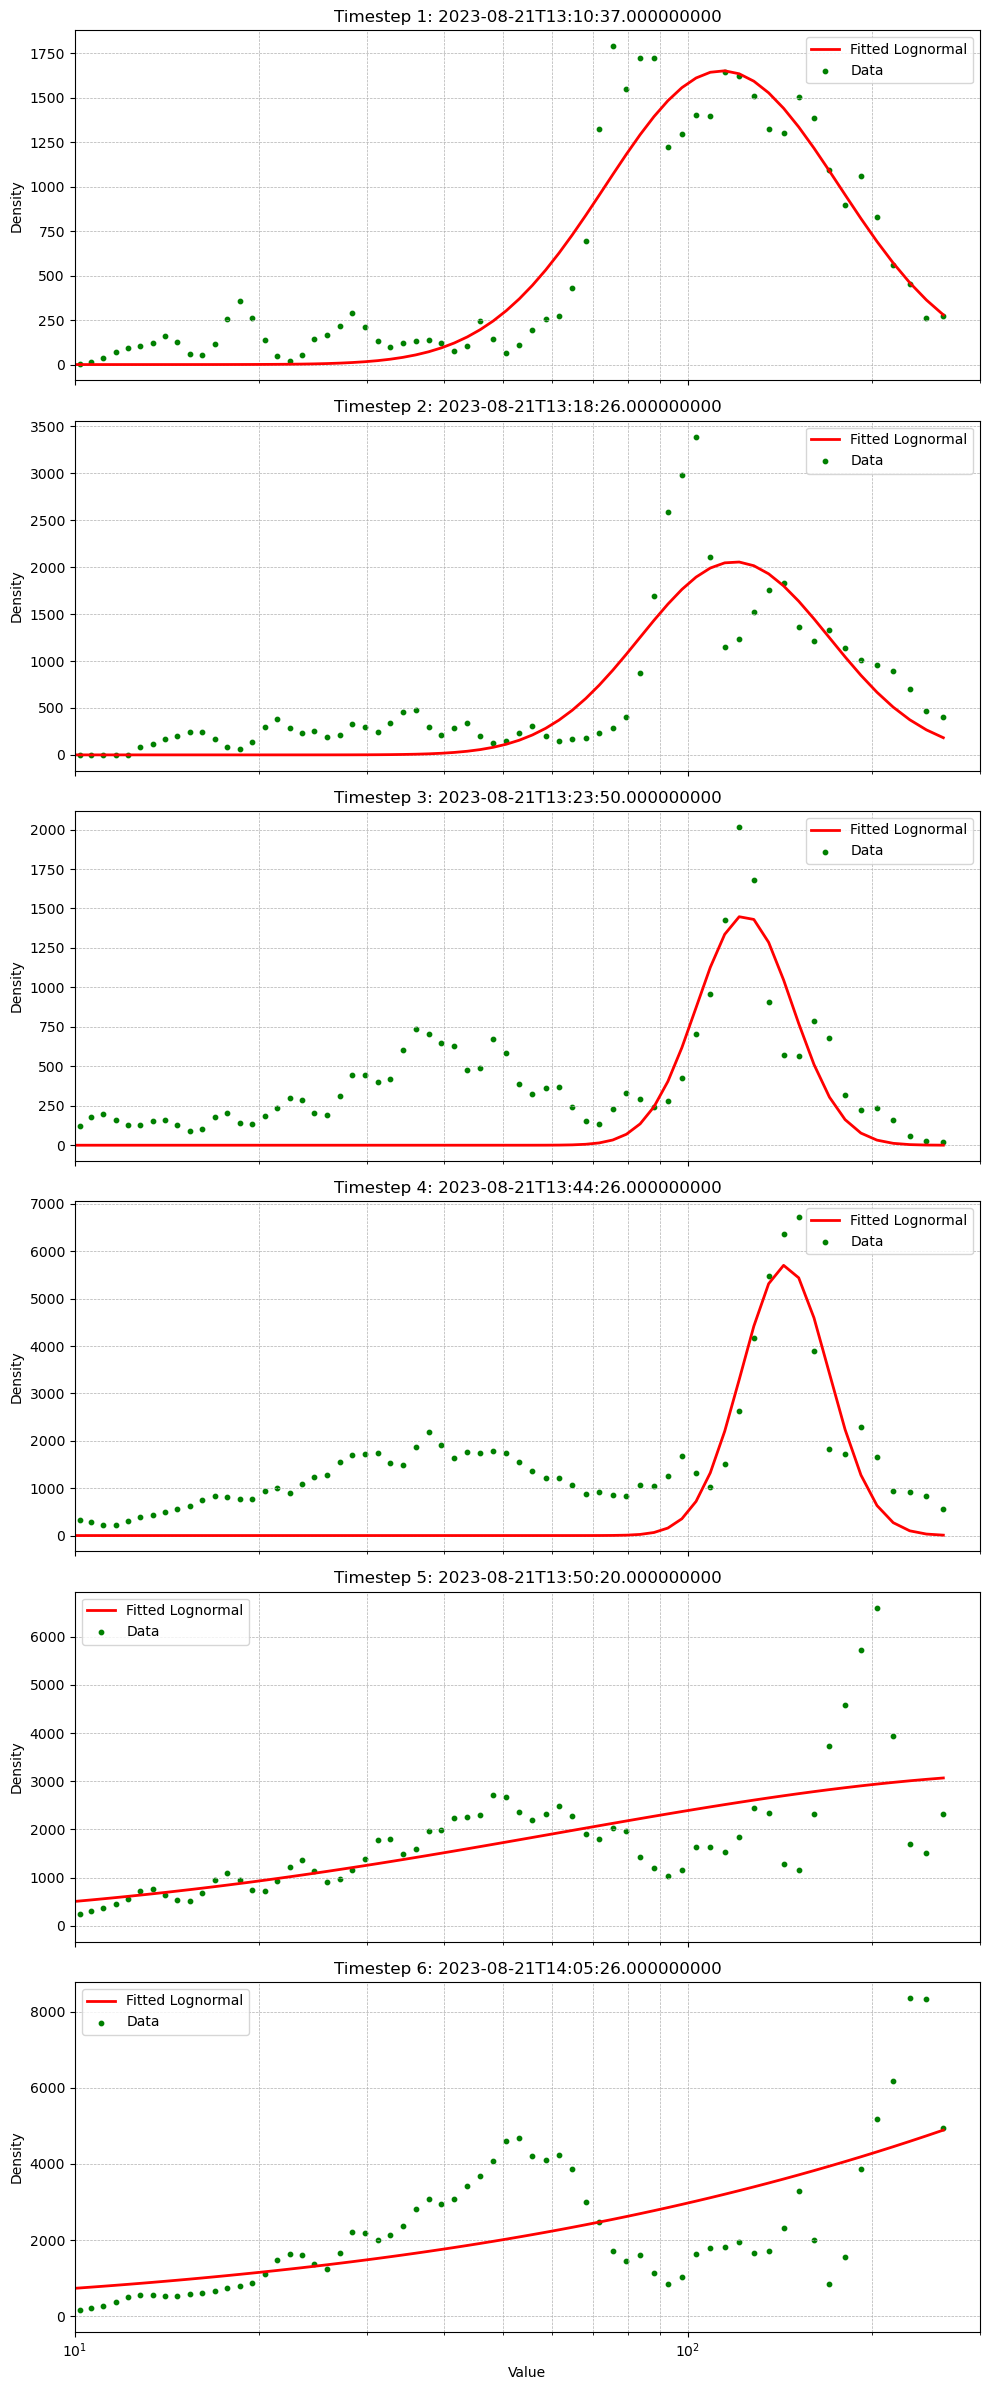

In [ ]:
from scipy.optimize import curve_fit


num_timesteps = len(data['time'].values)

# Create subplots for each timestep
fig, axes = plt.subplots(num_timesteps, 1, figsize=(10, 4*num_timesteps), sharex=True, )

# Iterate over each timestep
for idx, ax in enumerate(axes):
    # Extract the data for the current timestep
    measurement_data = data.sel(time=data['time'].values[idx]).values
    
    # Extract the relevant range from the data (20th to 200th value)
    x_data = data['bin'].values
    y_data = measurement_data
    
    # Initial guesses based on the previous fitting process
    mu_init = centers[idx] if idx < len(centers) else centers[-1]  # Use the last center for the remaining timesteps
    sigma_init = 1.2
    K_init = max(measurement_data)
    
    # Use curve_fit to optimize the parameters
    params_opt, _ = curve_fit(lognormal_nls, x_data, y_data, p0=[mu_init, sigma_init, K_init], maxfev=10000)
    
    # Generate the fitted data using the optimized parameters
    y_fitted = lognormal_nls(x_data, *params_opt)
    
    # Plot the fitted distribution and data points
    ax.plot(x_data, y_fitted, 'r-', lw=2, label="Fitted Lognormal",)
    ax.scatter(x_data, y_data, s=10, color='g', label="Data")
    ax.set_xscale('log')
    ax.set_xlim(10, 300)
    
    # Set subplot title, labels, and grid
    ax.set_title(f"Timestep {idx+1}: {data['time'].values[idx]}")
    ax.set_ylabel("Density")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    if idx == num_timesteps - 1:
        ax.set_xlabel("Value")
    ax.legend()

# Adjust the layout to ensure no overlap
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import lognorm

In [ ]:
ds.to_netcdf('/home/josh/OneDrive/TROPOS/mSMES/msems_calibration.nc')

In [ ]:
shape, loc, scale = lognorm.fit(ds.isel(time=1))

shape, loc, scale

(1.4821136379712518, -11.517026548653822, 217.98012714070114)

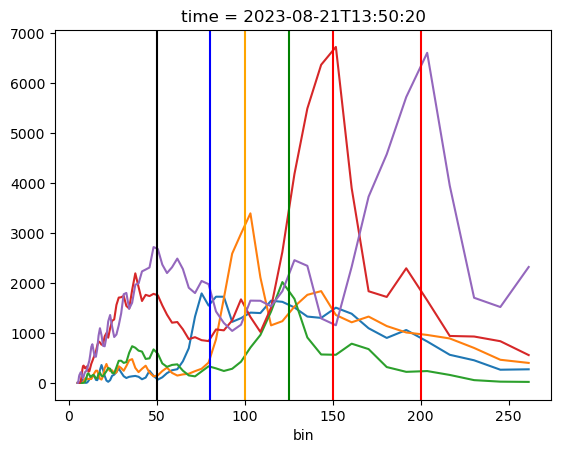

In [ ]:
list_of_xarrays[3].isel(time=24).plot()
list_of_xarrays[3].isel(time=27).plot()
list_of_xarrays[3].isel(time=30).plot()
list_of_xarrays[3].isel(time=38).plot()
list_of_xarrays[3].isel(time=40).plot()




plt.axvline(x=50, color='k')
plt.axvline(x=80, color='b')
plt.axvline(x=100, color='orange')
plt.axvline(x=125, color='green')
plt.axvline(x=150, color='r')
plt.axvline(x=200, color='r')

In [ ]:
bin_dia_cols = [col for col in data.columns if 'bin_dia' in col]
bin_conc_cols = [col for col in data.columns if 'bin_conc' in col]


In [203]:
def read_readings(file):

    data = pd.read_csv(file, skiprows=32, delimiter='\t')


    time = data['#YY/MM/DD']+'T'+data['HR:MN:SC']

    time = pd.to_datetime(time, format='%y/%m/%dT%H:%M:%S')
    data['time'] = time
    data = data.drop(columns=['#YY/MM/DD', 'HR:MN:SC'])

    return data

file = '/home/josh/OneDrive/TROPOS/mSMES/21-08-23/mSEMS_107_230821_120000_READINGS.txt'

readings = read_readings(file)
